<a href="https://colab.research.google.com/github/BakiBakiSudo61/Bayesian-Optimization/blob/main/%E3%83%99%E3%82%A4%E3%82%BA%E6%9C%80%E9%81%A9%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize
!pip install --upgrade matplotlib numpy

In [ ]:
import numpy as np
from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_evaluations

print("準備完了です！")

準備完了です！


Step 1: ブラックボックス関数を定義する<br>
まず、最適化したい対象の関数をPythonで定義します。今回は例として、少し複雑な波形の関数objective_functionを用意しました。gp_minimizeは、この式の中身を見ることなく、色々なxを入れては結果のyを受け取る、という動作を繰り返します。

In [ ]:
# これが最適化したいブラックボックス関数
def objective_function(x):
    # gp_minimizeはリスト形式で値を受け取るので、x[0]と書きます
    return np.sin(x[0]) + (x[0] / 10)**2

Step 2: 探索範囲を決める<br>
次に、どこからどこまでの範囲で最小値を探すかを指定します。今回は-10から10の間を探してもらいましょう。

In [ ]:
# 探索範囲を定義 (-10から10まで)
search_space = [(-10.0, 10.0)]

Step 3: ベイズ最適化を実行！<br>
いよいよ主役のgp_minimizeを呼び出します。たった1行で、これまで学んだ複雑な処理をすべて実行してくれます。

objective_function: 先ほど定義した関数

search_space: 探索範囲

n_calls: 関数を試行する合計回数（探索の回数）

random_state: 毎回同じ結果にするための固定値

In [ ]:
# ベイズ最適化を実行
result = gp_minimize(
    func=objective_function,
    dimensions=search_space,
    n_calls=20,  # 20回試行する
    random_state=42
)

Step 4: 結果を確認する<br>
最適化が終わったら、見つかった最小値と、その時の入力xの値を見てみましょう。

In [ ]:
# 結果を表示
print(f"見つかった最小値: {result.fun:.4f}")
print(f"その時のxの値: {result.x[0]:.4f}")

見つかった最小値: -0.9758
その時のxの値: -1.5384


コードまとめ

In [ ]:
import numpy as np
from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_evaluations

# 1. これが最適化したいブラックボックス関数
def objective_function(x):
    # gp_minimizeはリスト形式で値を受け取るので、x[0]と書きます
    return np.sin(x[0]) + (x[0] / 10)**2

    # 最大値を返したい場合
    #return -1 * (np.sin(x[0]) + (x[0] / 10)**2)

# 2. 探索範囲を定義 (-10から10まで)
search_space = [(-10.0, 10.0)]

# 3. ベイズ最適化を実行
result = gp_minimize(
    func=objective_function,
    dimensions=search_space,
    n_calls=20,  # 20回試行する
    random_state=42 # 結果を固定
)

# 4. 結果を表示
print(f"見つかった最小値: {result.fun:.4f}")
#print(f"見つかった最大値: {result.fun:.4f}")
print(f"その時のxの値: {result.x[0]:.4f}")



見つかった最大値: -1.6294
その時のxの値: 8.0022


結果の可視化：最適化の過程を覗いてみよう
scikit-optimizeには、結果を分かりやすくプロットしてくれる便利な関数が用意されています。
先ほどの結果オブジェクトresultを、以下のプロット関数に渡すだけです。

このコードをColabの新しいセルに貼り付けて実行してみてください。2種類のグラフが表示されるはずです。

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

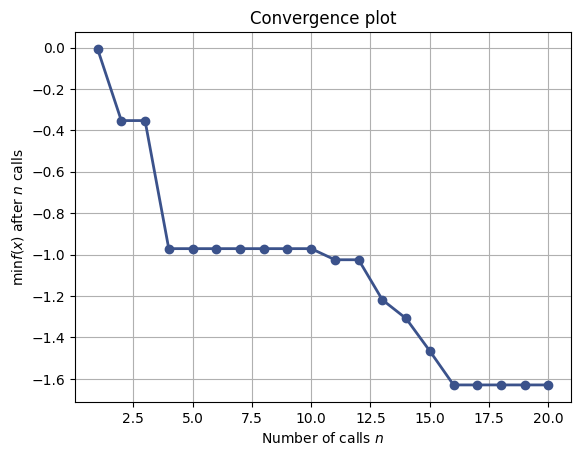

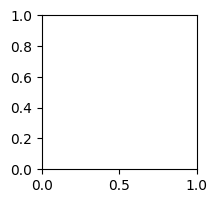

In [ ]:
from skopt.plots import plot_convergence, plot_evaluations

# 1. 収束プロット: 試行回数ごとに見つかった最小値がどう変化したか
plot_convergence(result)

# 2. 評価プロット: どのxの値を試したかと、その時のサロゲートモデルの予測
plot_evaluations(result)

## 2次元問題への拡張
1次元から2次元への拡張は、実はとても簡単です。変更点はたったの2つだけです。

目的関数が2つの変数 (x と y) を受け取るようにする。

探索範囲を x と y それぞれに設定する。

今回は、有名なBranin関数という、最適化のベンチマークによく使われる美しい形の関数を相手にしてみましょう。この関数には最小値が3つあるため、最適化アルゴリズムにとっては少し意地悪な問題です。

## コードを修正してみよう！

In [ ]:
# 目的関数
def objective_function_2d(x):
    # x[0]がx座標、x[1]がy座標に対応
    x1 = x[0]
    x2 = x[1]
    # Branin関数の定義
    a = 1.
    b = 5.1 / (4. * np.pi**2)
    c = 5. / np.pi
    r = 6.
    s = 10.
    t = 1. / (8. * np.pi)
    term1 = a * (x2 - b * x1**2 + c * x1 - r)**2
    term2 = s * (1 - t) * np.cos(x1)
    return term1 + term2 + s

# 探索範囲
# x1の範囲: -5から10まで
# x2の範囲: 0から15まで
search_space_2d = [(-5.0, 10.0), (0.0, 15.0)]

## やってみよう！
以下のコードを実行して、ベイズ最適化が2次元の複雑な地形から最小値を見つけ出せるか試してみましょう！

見つかった最小値: 0.3987
その時の[x, y]の値: [9.422090968787144, 2.5010363197095464]


<Axes: >

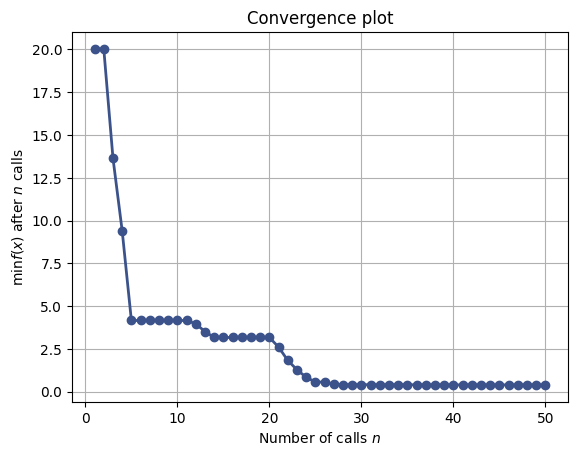

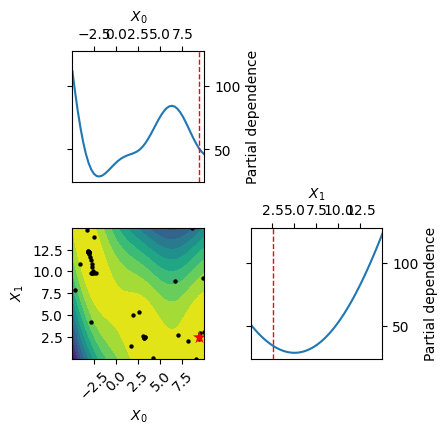

In [ ]:
import numpy as np
from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_objective

# 1. 2次元の目的関数を定義 (Branin function)
def objective_function_2d(x):
    x1 = x[0]
    x2 = x[1]
    a = 1.
    b = 5.1 / (4. * np.pi**2)
    c = 5. / np.pi
    r = 6.
    s = 10.
    t = 1. / (8. * np.pi)
    term1 = a * (x2 - b * x1**2 + c * x1 - r)**2
    term2 = s * (1 - t) * np.cos(x1)
    return term1 + term2 + s

# 2. 2次元の探索範囲を定義
# x1の範囲: -5から10まで
# x2の範囲: 0から15まで
search_space_2d = [(-5.0, 10.0), (0.0, 15.0)]

# 3. ベイズ最適化を実行 (試行回数を少し増やしてみましょう)
result_2d = gp_minimize(
    func=objective_function_2d,
    dimensions=search_space_2d,
    n_calls=50,  # 2次元なので予算を少し増やす
    random_state=42
)

# 4. 結果を表示
print(f"見つかった最小値: {result_2d.fun:.4f}")
print(f"その時の[x, y]の値: {result_2d.x}")

# 5. 可視化
plot_convergence(result_2d)
plot_objective(result_2d, n_points=50) # 探索空間を地図のように表示

## 体験プロジェクト：AIモデルの性能を最大化せよ！🔬
今回は、乳がんのデータセットを使って、「がんは陽性か陰性か」を予測するAIモデル（Support Vector Machine）を扱います。このモデルにはCとgammaという2つの重要な「設定値」があり、この値の組み合わせによって予測精度が大きく変わります。

私たちのミッションは、ベイズ最適化を使って、このモデルの精度が最も高くなるCとgammaの組み合わせを見つけ出すことです。

今回の目的関数
目的関数の中身はこうなっています。

ベイズ最適化が提案したCとgammaの値でAIモデルを作成する。

そのモデルの性能をクロスバリデーションという方法で公平に評価する。（データを分割して、複数回テストを行い、平均スコアを出すことで、より信頼できる性能評価をします）

精度のスコアを最大化したいので、例のトリックを使ってスコアに-1を掛けた値を返す。（gp_minimizeは最小値を探すため）

## やってみよう！
以下のコードは、このAIモデルのチューニングを全自動で行います。各ステップで何をしているかコメントを入れたので、流れを追ってみてください。

注意: 今回の目的関数は、内部でAIモデルの学習と評価を何度も行うため、**実行に1〜2分ほどかかります。**気長に待ってみてくださいね。

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

# --- 1. 準備：データと探索範囲を定義 ---

# 乳がんデータセットをロード
data = load_breast_cancer()
X, y = data.data, data.target

# 探索するパラメータの範囲を定義
# Real(最小値, 最大値, "log-uniform")は対数スケールで探索することを示す
space  = [
    Real(1e-6, 100.0, "log-uniform", name='C'),
    Real(1e-6, 1.0, "log-uniform", name='gamma')
]

# --- 2. 目的関数を定義 ---

# @use_named_args(space)は、[C, gamma]のリストを辞書形式に変換してくれる便利な機能
@use_named_args(space)
def objective(**params):
    # 受け取ったパラメータでAIモデルを作成
    model = SVC(**params)

    # 3分割交差検証でモデルの精度を評価し、平均スコアを計算
    score = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='accuracy'))

    # スコアを最大化したいので、-1を掛けて返す
    return -1.0 * score


# --- 3. ベイズ最適化を実行 ---
# n_callsを30に設定
result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=30,
    random_state=42
)

# --- 4. 結果を表示 ---
print(f"見つかった最高の精度スコア: {-1 * result.fun:.4f}")
print("その時の最適なパラメータ設定:")
print(f"C: {result.x[0]:.4f}")
print(f"gamma: {result.x[1]:.4f}")

見つかった最高の精度スコア: 0.9490
その時の最適なパラメータ設定:
C: 54.1487
gamma: 0.0000
